<a href="https://colab.research.google.com/github/amanmehra-23/IPD/blob/main/IPD_retry.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
 !pip install transformers datasets torchvision timm opencv-python-headless kaggle

In [3]:
import os
import shutil

# Create the .kaggle directory
os.makedirs('/root/.kaggle/', exist_ok=True)

# Move kaggle.json to the .kaggle directory
shutil.move('kaggle.json', '/root/.kaggle/kaggle.json')

# Set permissions
os.chmod('/root/.kaggle/kaggle.json', 0o600)

In [4]:
# Download the dataset
!kaggle datasets download -d prathumarikeri/indian-sign-language-isl
import zipfile
import os
with zipfile.ZipFile('indian-sign-language-isl.zip', 'r') as zip_ref:
    zip_ref.extractall('ISL_Dataset')

Dataset URL: https://www.kaggle.com/datasets/prathumarikeri/indian-sign-language-isl
License(s): CC-BY-SA-4.0
 99% 278M/281M [00:14<00:00, 19.5MB/s]
100% 281M/281M [00:14<00:00, 20.7MB/s]


In [5]:
import os

# Check if the dataset folder exists
if not os.path.exists("ISL_Dataset"):
    print("⚠️ The 'ISL_Dataset' folder does not exist in the current working directory!")
else:
    print("Contents of 'ISL_Dataset':", os.listdir("ISL_Dataset"))


Contents of 'ISL_Dataset': ['Indian']


In [6]:
import os
import shutil
from sklearn.model_selection import train_test_split

# Adjust dataset path if needed
dataset_path = "ISL_Dataset/Indian"  # Ensure this path is correct
train_path = "ISL_Dataset/train"
val_path = "ISL_Dataset/val"
test_path = "ISL_Dataset/test"

# Ensure the dataset exists before proceeding
if not os.path.exists(dataset_path):
    raise FileNotFoundError(f"❌ Dataset path not found: {dataset_path}")

# Ensure the destination directories exist
os.makedirs(train_path, exist_ok=True)
os.makedirs(val_path, exist_ok=True)
os.makedirs(test_path, exist_ok=True)

# Split dataset parameters
train_ratio = 0.7
val_ratio = 0.15
test_ratio = 0.15

# Iterate through each class folder
for class_name in os.listdir(dataset_path):
    class_folder = os.path.join(dataset_path, class_name)

    if os.path.isdir(class_folder):
        images = os.listdir(class_folder)

        # Ensure there are enough images before splitting
        if len(images) < 10:  # Skip classes with too few images
            continue

        # Split dataset into train, validation, and test sets
        train_imgs, temp_imgs = train_test_split(images, test_size=(1 - train_ratio), random_state=42)
        val_imgs, test_imgs = train_test_split(temp_imgs, test_size=(test_ratio / (test_ratio + val_ratio)), random_state=42)

        # Create class subfolders in train, val, and test directories
        os.makedirs(os.path.join(train_path, class_name), exist_ok=True)
        os.makedirs(os.path.join(val_path, class_name), exist_ok=True)
        os.makedirs(os.path.join(test_path, class_name), exist_ok=True)

        # Move training images
        for img in train_imgs:
            shutil.move(os.path.join(class_folder, img), os.path.join(train_path, class_name, img))

        # Move validation images
        for img in val_imgs:
            shutil.move(os.path.join(class_folder, img), os.path.join(val_path, class_name, img))

        # Move testing images
        for img in test_imgs:
            shutil.move(os.path.join(class_folder, img), os.path.join(test_path, class_name, img))

# Confirm dataset split
print("✅ Dataset split completed successfully!")
print(f"Training data in: {train_path}")
print(f"Validation data in: {val_path}")
print(f"Testing data in: {test_path}")
import os
import shutil
from sklearn.model_selection import train_test_split

# Adjust dataset path if needed
dataset_path = "ISL_Dataset/Indian"  # Ensure this path is correct
train_path = "ISL_Dataset/train"
val_path = "ISL_Dataset/val"
test_path = "ISL_Dataset/test"

# Ensure the dataset exists before proceeding
if not os.path.exists(dataset_path):
    raise FileNotFoundError(f"❌ Dataset path not found: {dataset_path}")

# Ensure the destination directories exist
os.makedirs(train_path, exist_ok=True)
os.makedirs(val_path, exist_ok=True)
os.makedirs(test_path, exist_ok=True)

# Split dataset parameters
train_ratio = 0.7
val_ratio = 0.15
test_ratio = 0.15

# Iterate through each class folder
for class_name in os.listdir(dataset_path):
    class_folder = os.path.join(dataset_path, class_name)

    if os.path.isdir(class_folder):
        images = os.listdir(class_folder)

        # Ensure there are enough images before splitting
        if len(images) < 10:  # Skip classes with too few images
            continue

        # Split dataset into train, validation, and test sets
        train_imgs, temp_imgs = train_test_split(images, test_size=(1 - train_ratio), random_state=42)
        val_imgs, test_imgs = train_test_split(temp_imgs, test_size=(test_ratio / (test_ratio + val_ratio)), random_state=42)

        # Create class subfolders in train, val, and test directories
        os.makedirs(os.path.join(train_path, class_name), exist_ok=True)
        os.makedirs(os.path.join(val_path, class_name), exist_ok=True)
        os.makedirs(os.path.join(test_path, class_name), exist_ok=True)

        # Move training images
        for img in train_imgs:
            shutil.move(os.path.join(class_folder, img), os.path.join(train_path, class_name, img))

        # Move validation images
        for img in val_imgs:
            shutil.move(os.path.join(class_folder, img), os.path.join(val_path, class_name, img))

        # Move testing images
        for img in test_imgs:
            shutil.move(os.path.join(class_folder, img), os.path.join(test_path, class_name, img))

# Confirm dataset split
print("✅ Dataset split completed successfully!")
print(f"Training data in: {train_path}")
print(f"Validation data in: {val_path}")
print(f"Testing data in: {test_path}")


✅ Dataset split completed successfully!
Training data in: ISL_Dataset/train
Validation data in: ISL_Dataset/val
Testing data in: ISL_Dataset/test
✅ Dataset split completed successfully!
Training data in: ISL_Dataset/train
Validation data in: ISL_Dataset/val
Testing data in: ISL_Dataset/test


In [7]:
import torch
import torch.nn as nn
from transformers import ViTForImageClassification, ViTFeatureExtractor
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Define Transformations (Same as Pretrained ViT)
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Load the dataset
train_dataset = datasets.ImageFolder(root='ISL_Dataset/train', transform=transform)
val_dataset = datasets.ImageFolder(root='ISL_Dataset/val', transform=transform)
test_dataset = datasets.ImageFolder(root='ISL_Dataset/test', transform=transform)

# Create DataLoaders
batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=4)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=4)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=4)

# Print class names to verify (Should be 36 classes)
print("✅ Classes in dataset:", train_dataset.classes)
num_labels = len(train_dataset.classes)  # Automatically set the number of labels
import torch
import torch.nn as nn
from transformers import ViTForImageClassification, ViTFeatureExtractor
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Define Transformations (Same as Pretrained ViT)
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Load the dataset
train_dataset = datasets.ImageFolder(root='ISL_Dataset/train', transform=transform)
val_dataset = datasets.ImageFolder(root='ISL_Dataset/val', transform=transform)
test_dataset = datasets.ImageFolder(root='ISL_Dataset/test', transform=transform)

# Create DataLoaders
batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=4)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=4)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=4)

# Print class names to verify (Should be 36 classes)
print("✅ Classes in dataset:", train_dataset.classes)
num_labels = len(train_dataset.classes)  # Automatically set the number of labels


✅ Classes in dataset: ['1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']
✅ Classes in dataset: ['1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


In [8]:
# Load Pretrained Model
model_name = "google/vit-base-patch16-224-in21k"
model = ViTForImageClassification.from_pretrained(model_name, num_labels=num_labels)

# Send model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Define Feature Extractor
feature_extractor = ViTFeatureExtractor.from_pretrained(model_name)

print(f"✅ Model loaded with {num_labels} classes!")


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/502 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/346M [00:00<?, ?B/s]

Some weights of ViTForImageClassification were not initialized from the model checkpoint at google/vit-base-patch16-224-in21k and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


preprocessor_config.json:   0%|          | 0.00/160 [00:00<?, ?B/s]

✅ Model loaded with 35 classes!


/usr/local/lib/python3.11/dist-packages/transformers/models/vit/feature_extraction_vit.py:28: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(


In [9]:
from transformers import AdamW, get_scheduler

# Define Optimizer & Loss
optimizer = AdamW(model.parameters(), lr=3e-4, weight_decay=1e-4)
criterion = nn.CrossEntropyLoss()

# Define Learning Rate Scheduler
num_training_steps = len(train_loader) * 5  # Assuming 5 epochs
lr_scheduler = get_scheduler("cosine", optimizer=optimizer, num_warmup_steps=100, num_training_steps=num_training_steps)


/usr/local/lib/python3.11/dist-packages/transformers/optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [10]:
from tqdm import tqdm

# Training Loop
def train_model(model, train_loader, val_loader, optimizer, criterion, lr_scheduler, epochs=5):
    model.train()

    for epoch in range(epochs):
        print(f"\nEpoch {epoch+1}/{epochs}")
        running_loss = 0.0
        correct = 0
        total = 0

        loop = tqdm(train_loader, leave=True)
        for images, labels in loop:
            images, labels = images.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(images).logits
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            lr_scheduler.step()

            running_loss += loss.item()
            _, predicted = outputs.max(1)
            correct += (predicted == labels).sum().item()
            total += labels.size(0)

            loop.set_description(f"Epoch {epoch+1}/{epochs}")
            loop.set_postfix(loss=loss.item(), acc=100 * correct / total)

        print(f"Epoch {epoch+1}: Loss: {running_loss/len(train_loader):.4f}, Accuracy: {100 * correct / total:.2f}%")

        # Run validation after each epoch
        validate_model(model, val_loader)

def validate_model(model, val_loader):
    model.eval()
    correct = 0
    total = 0
    running_loss = 0.0

    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)

            outputs = model(images).logits
            loss = criterion(outputs, labels)
            running_loss += loss.item()

            _, predicted = outputs.max(1)
            correct += (predicted == labels).sum().item()
            total += labels.size(0)

    val_accuracy = 100 * correct / total
    print(f"🔹 Validation Loss: {running_loss / len(val_loader):.4f}, Accuracy: {val_accuracy:.2f}%")
    model.train()  # Switch back to training mode

# Start training
train_model(model, train_loader, val_loader, optimizer, criterion, lr_scheduler, epochs=5)



Epoch 1/5


Epoch 1/5: 100%|██████████| 934/934 [16:10<00:00,  1.04s/it, acc=98.2, loss=0.00427]

Epoch 1: Loss: 0.2355, Accuracy: 98.23%


🔹 Validation Loss: 0.0043, Accuracy: 100.00%

Epoch 2/5


Epoch 2/5: 100%|██████████| 934/934 [16:22<00:00,  1.05s/it, acc=100, loss=0.00126]

Epoch 2: Loss: 0.0023, Accuracy: 100.00%


🔹 Validation Loss: 0.0013, Accuracy: 100.00%

Epoch 3/5


Epoch 3/5: 100%|██████████| 934/934 [16:26<00:00,  1.06s/it, acc=100, loss=0.00067]

Epoch 3: Loss: 0.0009, Accuracy: 100.00%


🔹 Validation Loss: 0.0007, Accuracy: 100.00%

Epoch 4/5


Epoch 4/5: 100%|██████████| 934/934 [16:21<00:00,  1.05s/it, acc=100, loss=0.000503]

Epoch 4: Loss: 0.0006, Accuracy: 100.00%


🔹 Validation Loss: 0.0005, Accuracy: 100.00%

Epoch 5/5


Epoch 5/5: 100%|██████████| 934/934 [16:23<00:00,  1.05s/it, acc=100, loss=0.000485]

Epoch 5: Loss: 0.0005, Accuracy: 100.00%


🔹 Validation Loss: 0.0005, Accuracy: 100.00%


In [11]:
torch.save(model.state_dict(), "isl_vit_model.pth")

# Download model to local storage
from google.colab import files
files.download("isl_vit_model.pth")

print("✅ Model saved and downloaded successfully!")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

✅ Model saved and downloaded successfully!


In [15]:
from sklearn.metrics import classification_report, confusion_matrix

# Define class names from test dataset
class_names = test_dataset.classes  # Ensure this is defined

# Function to Evaluate Model on Test Set
def evaluate_model(model, test_loader):
    model.eval()
    true_labels = []
    pred_labels = []

    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)

            outputs = model(images).logits
            _, predicted = outputs.max(1)

            true_labels.extend(labels.cpu().numpy())
            pred_labels.extend(predicted.cpu().numpy())

    # Generate Classification Report
    report = classification_report(true_labels, pred_labels, target_names=class_names)
    print("\n📊 **Final Classification Report**")
    print(report)

    return true_labels, pred_labels

# Run evaluation
true_labels, pred_labels = evaluate_model(model, test_loader)




📊 **Final Classification Report**
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       181
           2       1.00      1.00      1.00       181
           3       1.00      1.00      1.00       181
           4       1.00      1.00      1.00       181
           5       1.00      1.00      1.00       181
           6       1.00      1.00      1.00       181
           7       1.00      1.00      1.00       181
           8       1.00      1.00      1.00       181
           9       1.00      1.00      1.00       181
           A       1.00      1.00      1.00       181
           B       1.00      1.00      1.00       181
           C       1.00      1.00      1.00       218
           D       1.00      1.00      1.00       181
           E       1.00      1.00      1.00       181
           F       1.00      1.00      1.00       181
           G       1.00      1.00      1.00       181
           H       1.00      1.00      1.00   

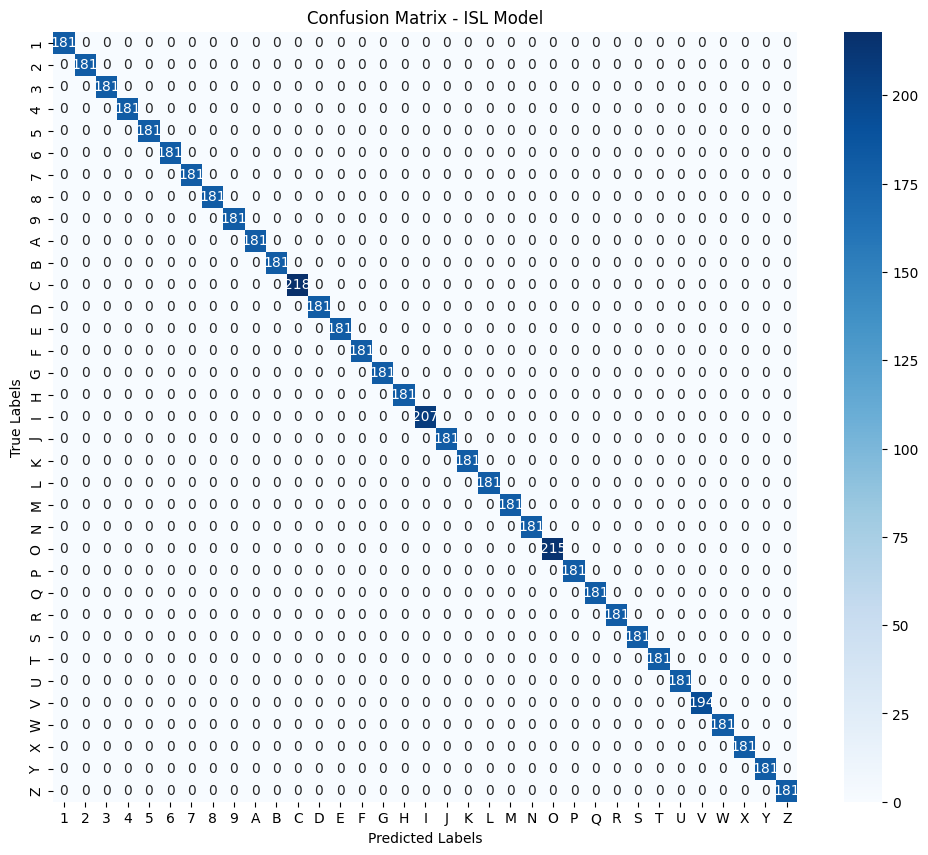

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
# Function to Plot Confusion Matrix
def plot_confusion_matrix(true_labels, pred_labels, class_names):
    conf_matrix = confusion_matrix(true_labels, pred_labels)

    plt.figure(figsize=(12, 10))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.title("Confusion Matrix - ISL Model")
    plt.show()

# Plot Confusion Matrix
plot_confusion_matrix(true_labels, pred_labels, class_names)
